In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
train_df=pd.read_csv('Train.csv')

In [3]:
train_df.head()


,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [4]:
train_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype='object')

In [5]:
## Label encoding column A of our dataset
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df['A']= label_encoder.fit_transform(train_df['A'])
  
train_df['A'].unique()

array([0, 2, 1])

In [6]:
X = train_df.drop(['Target'], axis=1)
y = train_df['Target']

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00031939 -0.03974202 -0.04420278 -0.04429855 -0.01821967  0.0029739
  -0.03128434 -0.03330812]
 [-0.03974202  1.00031939  0.98763367  0.80705058  0.92697586  0.9016102
   0.9050721   0.89769764]
 [-0.04420278  0.98763367  1.00031939  0.81279793  0.92711407  0.8970614
   0.90240227  0.90476011]
 [-0.04429855  0.80705058  0.81279793  1.00031939  0.80229688  0.76102619
   0.78305891  0.79698724]
 [-0.01821967  0.92697586  0.92711407  0.80229688  1.00031939  0.97117366
   0.96619694  0.95623282]
 [ 0.0029739   0.9016102   0.8970614   0.76102619  0.97117366  1.00031939
   0.93328813  0.88476295]
 [-0.03128434  0.9050721   0.90240227  0.78305891  0.96619694  0.93328813
   1.00031939  0.90634076]
 [-0.03330812  0.89769764  0.90476011  0.79698724  0.95623282  0.88476295
   0.90634076  1.00031939]]


In [9]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00031939 -0.03974202 -0.04420278 -0.04429855 -0.01821967  0.0029739
  -0.03128434 -0.03330812]
 [-0.03974202  1.00031939  0.98763367  0.80705058  0.92697586  0.9016102
   0.9050721   0.89769764]
 [-0.04420278  0.98763367  1.00031939  0.81279793  0.92711407  0.8970614
   0.90240227  0.90476011]
 [-0.04429855  0.80705058  0.81279793  1.00031939  0.80229688  0.76102619
   0.78305891  0.79698724]
 [-0.01821967  0.92697586  0.92711407  0.80229688  1.00031939  0.97117366
   0.96619694  0.95623282]
 [ 0.0029739   0.9016102   0.8970614   0.76102619  0.97117366  1.00031939
   0.93328813  0.88476295]
 [-0.03128434  0.9050721   0.90240227  0.78305891  0.96619694  0.93328813
   1.00031939  0.90634076]
 [-0.03330812  0.89769764  0.90476011  0.79698724  0.95623282  0.88476295
   0.90634076  1.00031939]]


In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.46279365e-02  9.98428698e-01 -3.87467982e-02 -2.57067146e-02
  -1.67287161e-02 -2.18855225e-02 -2.23412224e-03 -4.38844614e-04]
 [ 3.83999124e-01 -6.30227324e-03  2.35645789e-02 -5.92499888e-01
   8.96955068e-02 -2.97086039e-02  7.01160233e-01 -1.84388044e-02]
 [ 3.84318613e-01 -1.11402484e-02  1.44876482e-03 -5.89081873e-01
   1.30783504e-02 -1.33482207e-02 -7.10457669e-01  7.49854160e-03]
 [ 3.42615952e-01 -2.19122244e-02 -9.05836431e-01  2.13453098e-01
   1.22806663e-01  2.95747235e-02  8.56888947e-03  1.65292870e-03]
 [ 3.91468565e-01  2.16153994e-02  2.03964598e-01  2.58169634e-01
  -4.78641997e-02  1.15184171e-01 -1.42386214e-02 -8.49865228e-01]
 [ 3.79505813e-01  4.44275900e-02  2.90684811e-01  2.70323798e-01
   4.83261645e-01  5.65735994e-01 -1.67014347e-02  3.77559190e-01]
 [ 3.82324714e-01  7.15119620e-03  2.13911887e-01  2.96963734e-01
   1.88269708e-01 -8.02838813e-01 -1.84420075e-02  1.98733911e-01]
 [ 3.79209338e-01  1.99769436e-03  7.44590192e-02  1.66

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.3340574134907
1.001482827508579
0.3008341625320739
0.1683245449870301
0.11524297152770217
0.06433983005954112
0.012295344556416071
0.0059779995570687396


In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

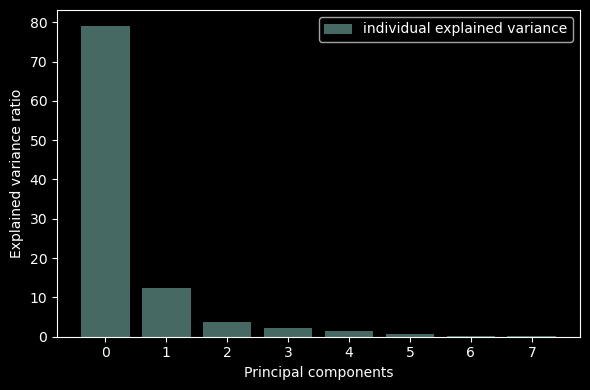

In [13]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
X_sklearn = sklearn_pca.fit_transform(X_std)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_sklearn)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_multi_trans, y, test_size = 0.1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_val)

In [35]:
mean_squared_error(y_val, y_pred)

3.3685453328919346

In [36]:
test_data = pd.read_csv('Test.csv')

In [37]:
test_data.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [38]:
test_data['A']= label_encoder.fit_transform(test_data['A'])

In [39]:
Index=test_data['Index']
test_data.drop(['Index'],axis=1,inplace=True)

In [40]:
from sklearn.preprocessing import StandardScaler
X_std1 = StandardScaler().fit_transform(test_data)

In [41]:
X_sklearn1 = sklearn_pca.fit_transform(X_std1)

In [42]:
X_multi_trans1 = poly.fit_transform(X_sklearn1)

In [43]:
y_test1=lr.predict(X_multi_trans1)

In [44]:
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test1

In [45]:
result

,Index,Target
0,866,11.316829
1,1483,10.419551
2,599,9.507730
3,1702,12.444374
4,670,9.226982
...,...,...
1040,532,8.990460
1041,3417,10.794576
1042,1505,11.104969
1043,2245,9.092692


In [46]:
result.to_csv("submission43pca_poly.csv", index=False)

In [47]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.01, max_iter=1000, tol=10)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.01, max_iter=1000, tol=10)

In [48]:
y_pred = ridge_reg.predict(X_val)

In [49]:
mean_squared_error(y_val, y_pred)

3.368389260361533

In [50]:
y_test1=ridge_reg.predict(X_multi_trans1)

In [51]:
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test1

In [52]:
result

,Index,Target
0,866,11.317707
1,1483,10.419697
2,599,9.507792
3,1702,12.444273
4,670,9.227160
...,...,...
1040,532,8.990442
1041,3417,10.794664
1042,1505,11.104681
1043,2245,9.092815
